<a href="https://colab.research.google.com/github/Derevenitckaia/Digital_Image_Processing/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Лабораторная работа No3: Основы методов пространственной обработки изображений**

Цель работы – изучение основных методов пространственной обработки цифровых изображений. Приобретение навыков использования градационных преобразований, пространственной фильтрации, операций над гистограммой изображения.


In [31]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

##1. Подготовить свой портрет в цифровом формате (полутоновое изображение с разрешением не более 800×800).

Text(0.5, 1.0, 'Изображение')

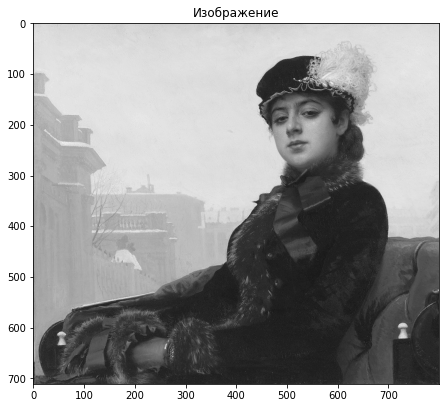

In [32]:
img = cv.imread('img.jpg', cv.IMREAD_GRAYSCALE)[:, 0:800]

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Изображение')

##2. Выполнить логарифмическое преобразование исходного изображения.

<ipython-input-33-d833d0e2db0a>:4: RuntimeWarning: divide by zero encountered in log
  log_img = c * (np.log(img + 1))


Text(0.5, 1.0, 'Логарифмичсекое преобразованиие')

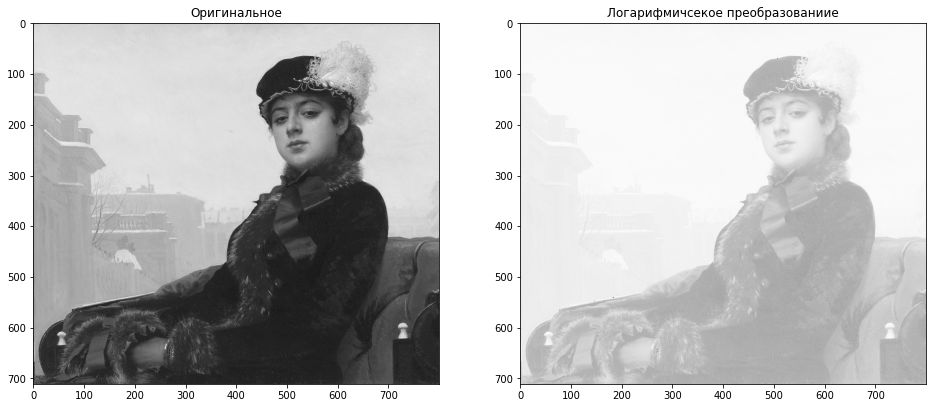

In [33]:
high, width = img.shape

c = 255 / np.log(1 + np.max(img))
log_img = c * (np.log(img + 1))

log_img = np.array(log_img, dtype = np.uint8)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Оригинальное')
plt.subplot(1, 2, 2)
plt.imshow(log_img, cmap='gray')
plt.title('Логарифмичсекое преобразованиие')

##3. Выполнить степенное преобразование исходного изображения для значений гамма 0.1, 0.45, 5 .

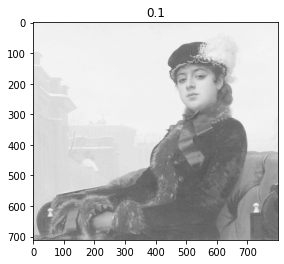

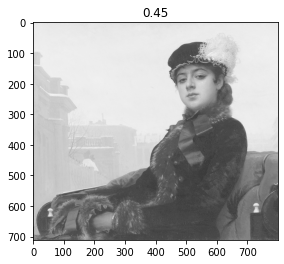

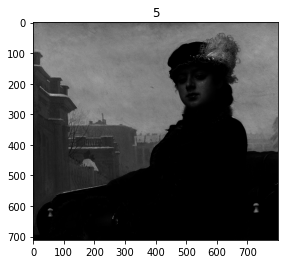

In [34]:
for gamma in [0.1, 0.45, 5]:
    
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')


    plt.figure()
    plt.imshow(gamma_corrected, cmap='gray')
    plt.title(f'{gamma}')


##4. Выполнить операцию кусочно-линейного преобразования в соответствии с вариантом индивидуального задания.

https://ru.hexlet.io/courses/python-numpy/lessons/vectorized-calculus/theory_unit

Text(0.5, 1.0, 'Кусочно-линейное преобразованиие')

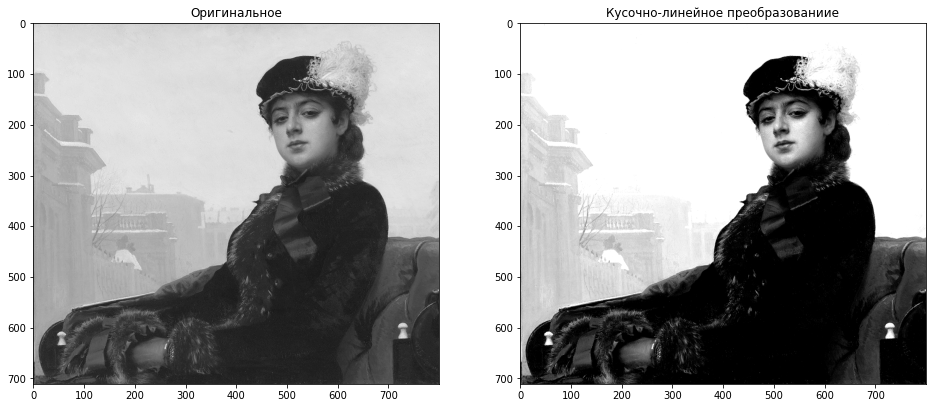

In [47]:
# Функция для сопоставления каждого уровня интенсивности с выходным уровнем интенсивности.
def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1)*pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2
  
  
# параметры функции
r1 = 55
s1 = 0
r2 = 200
s2 = 255
  
# Векторизуем функцию, чтобы применить ее к каждому значению в массиве Numpy.
pixelVal_vec = np.vectorize(pixelVal)
  

changed_img = pixelVal_vec(img, r1, s1, r2, s2)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Оригинальное')
plt.subplot(1, 2, 2)
plt.imshow(changed_img, cmap='gray')
plt.title('Кусочно-линейное преобразованиие')

##5. Выполнить операцию эквализации гистограммы над исходным изображением. 

(711, 800)


Text(0.5, 1.0, 'Гистограмма')

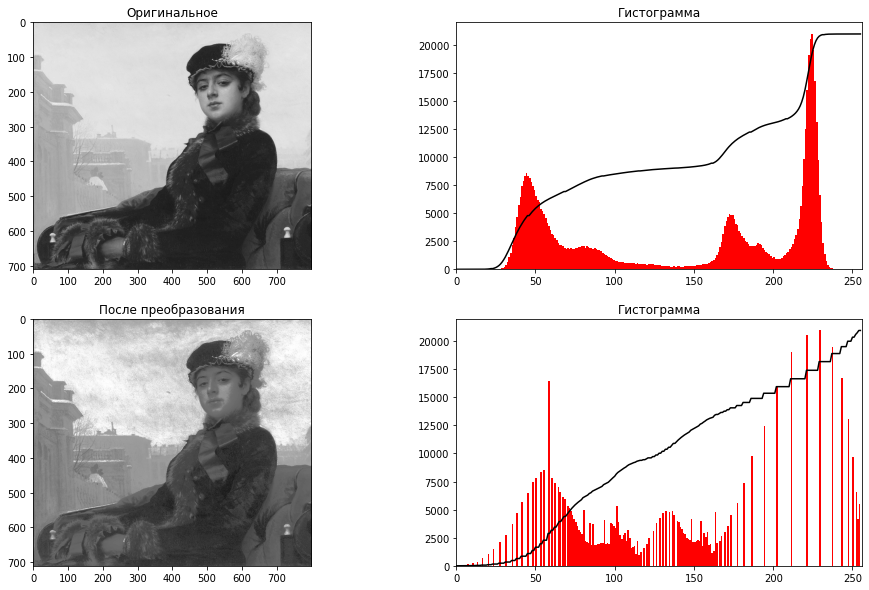

In [36]:
# cчитаем гистограмму
hist, bins = np.histogram(img, 256)
# определение кумулятивной функции распределения 
cdf = hist.cumsum()

cdf_normalized = cdf * float(hist.max()) / cdf.max()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
print(img.shape)
img2 = cdf[img]

hist2, bins2 = np.histogram(img2, 256)
cdf2 = hist2.cumsum()
cdf_normalized2 = cdf2 * float(hist2.max()) / cdf2.max()

plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Оригинальное')
plt.subplot(2, 2, 2)
plt.plot(cdf_normalized, color = 'k')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.title('Гистограмма')

plt.subplot(2, 2, 3)
plt.imshow(img2, cmap='gray')
plt.title('После преобразования')
plt.subplot(2, 2, 4)
plt.plot(cdf_normalized2, color = 'k')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.title('Гистограмма')

##6. Выполнить пространственную фильтрацию исходного изображения усредняющим фильтром с квадратной маской размерами 3, 15, 35.

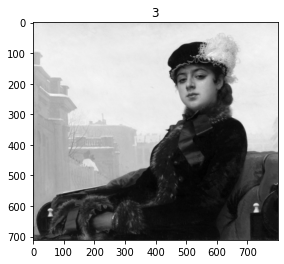

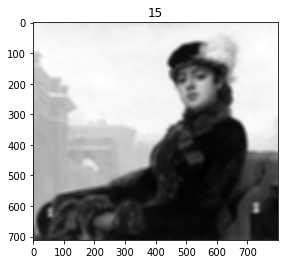

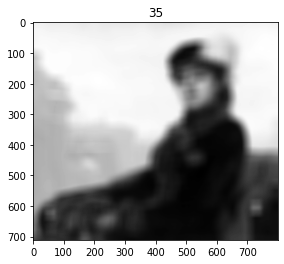

In [37]:
for size in [3, 15, 35]:
  kernel1 = np.ones((size, size), np.float32)/(size ** 2)
  img_filtred = cv.filter2D(src=img, ddepth=-1, kernel=kernel1)

  plt.figure()
  plt.imshow(img_filtred, cmap='gray')
  plt.title(f'{size}')
  


##7. Выполнить пространственную фильтрацию исходного изображения фильтром повышения резкости изображения.

Text(0.5, 1.0, 'Более резкое')

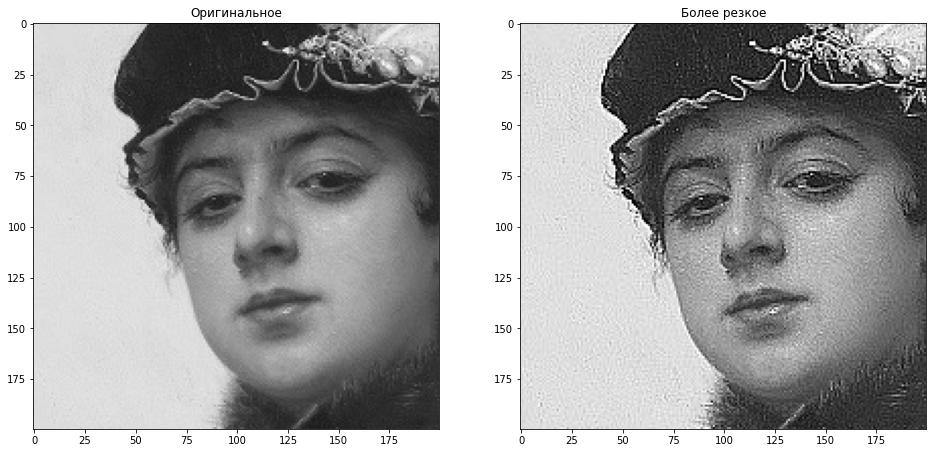

In [38]:
kernel2 = 1/4 * np.array([[-1, -1, -1],
                    [-1, 12, -1],
                    [-1, -1, -1]])

img_filtred = cv.filter2D(src=img, ddepth=-1, kernel=kernel2)


plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(img[100:300, 400:600], cmap='gray')
plt.title('Оригинальное')
plt.subplot(1, 2, 2)
plt.imshow(img_filtred[100:300, 400:600] , cmap='gray')
plt.title('Более резкое')

8. Выполнить пространственную фильтрацию исходного изображения медианным фильтром с квадратной маской размерами 3, 9, 15.

In [39]:
def median_filter(src, filter_size):
  
  img_f = src
  for x in range(width-filter_size):
    for y in range(high-filter_size):
      window = src[y : y + filter_size, x : x + filter_size]
      median = np.median(window)
      img_f[y , x ] = median 
  return(img_f)

Text(0.5, 1.0, 'Оригинал')

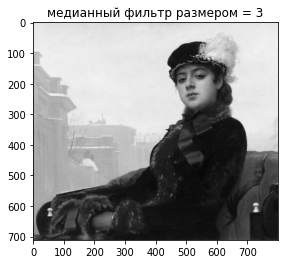

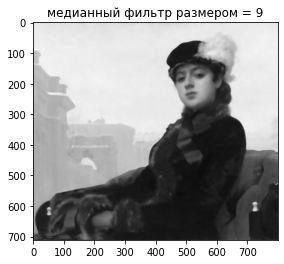

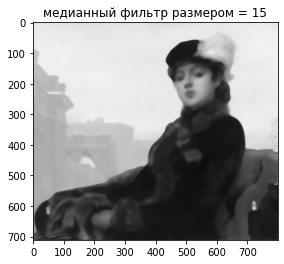

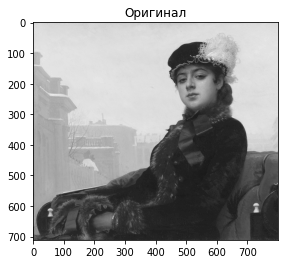

In [40]:
for size in [3, 9, 15]:
  img = cv.imread('img.jpg', cv.IMREAD_GRAYSCALE)[:, 0:800]
  img_filtred = median_filter(src=img, filter_size=size)

  plt.figure()
  plt.imshow(img_filtred, cmap='gray')
  plt.title(f'медианный фильтр размером = {size}')

img = cv.imread('img.jpg', cv.IMREAD_GRAYSCALE)[:, 0:800]
plt.figure()
plt.imshow(img, cmap='gray')
plt.title(f'Оригинал')

##9. Выполнить операцию выделения границ исходного изображения методами Робертса, Превитта, Собеля.

https://russianblogs.com/article/41811117754/

Text(0.5, 1.0, 'Собель')

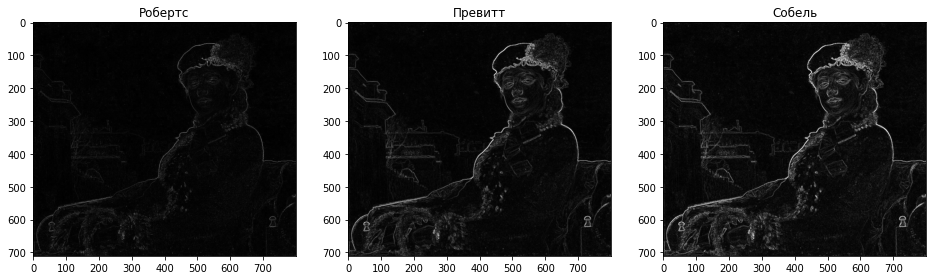

In [41]:
# Оператор Робертса
kernelx = np.array([[-1, 0], [0, 1]], dtype=int)
kernely = np.array([[0, -1], [1, 0]], dtype=int)
x = cv.filter2D(img, cv.CV_16S, kernelx)
y = cv.filter2D(img, cv.CV_16S, kernely)

absx = cv.convertScaleAbs(x)
absy = cv.convertScaleAbs(y)

Roberts = absx*0.5 + absy*0.5

# Оператор Превитта
kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)
kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=int)
x = cv.filter2D(img, cv.CV_16S, kernelx)
y = cv.filter2D(img, cv.CV_16S, kernely)

absx = cv.convertScaleAbs(x)
absy = cv.convertScaleAbs(y)

Perwitt = absx*0.5 + absy*0.5

# Оператор Собеля
kernelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=int)
kernely = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=int)
x = cv.filter2D(img, cv.CV_16S, kernelx)
y = cv.filter2D(img, cv.CV_16S, kernely)

absx = cv.convertScaleAbs(x)
absy = cv.convertScaleAbs(y)

Sobel = absx*0.5 + absy*0.5

plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)

plt.imshow(Roberts, cmap='gray')
plt.title(f'Робертс')

plt.subplot(1, 3, 2)

plt.imshow(Perwitt, cmap='gray')
plt.title(f'Превитт')

plt.subplot(1, 3, 3)

plt.imshow(Sobel, cmap='gray')
plt.title(f'Собель')

10. Добавить на исходное изображение шум в соответствии с вариантом индивидуального задания. Подобрать фильтр и выполнить пространственную фильтрацию зашумленного изображения таким образом, чтобы дисперсия отфильтрованного изображения была близка к дисперсии исходного изображения.

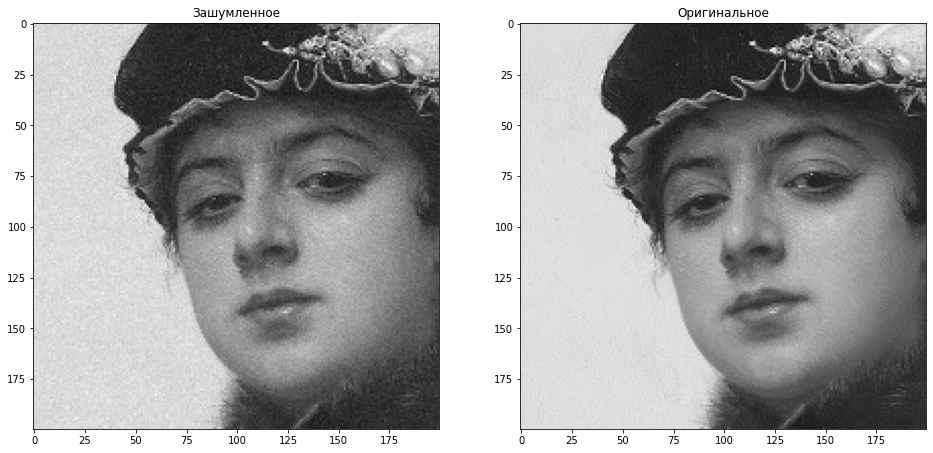

In [42]:
mu, sigma = 4, 0.1
noize = np.random.lognormal(mu, sigma, img.shape)

noisy_img = img + noize

# noisy_img = np.array(noisy_img, dtype=np.uint8)

import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(noisy_img[100:300, 400:600] , cmap='gray')
plt.title('Зашумленное')
plt.subplot(1, 2, 2)
plt.imshow(img[100:300, 400:600] , cmap='gray')
plt.title('Оригинальное')
plt.show()

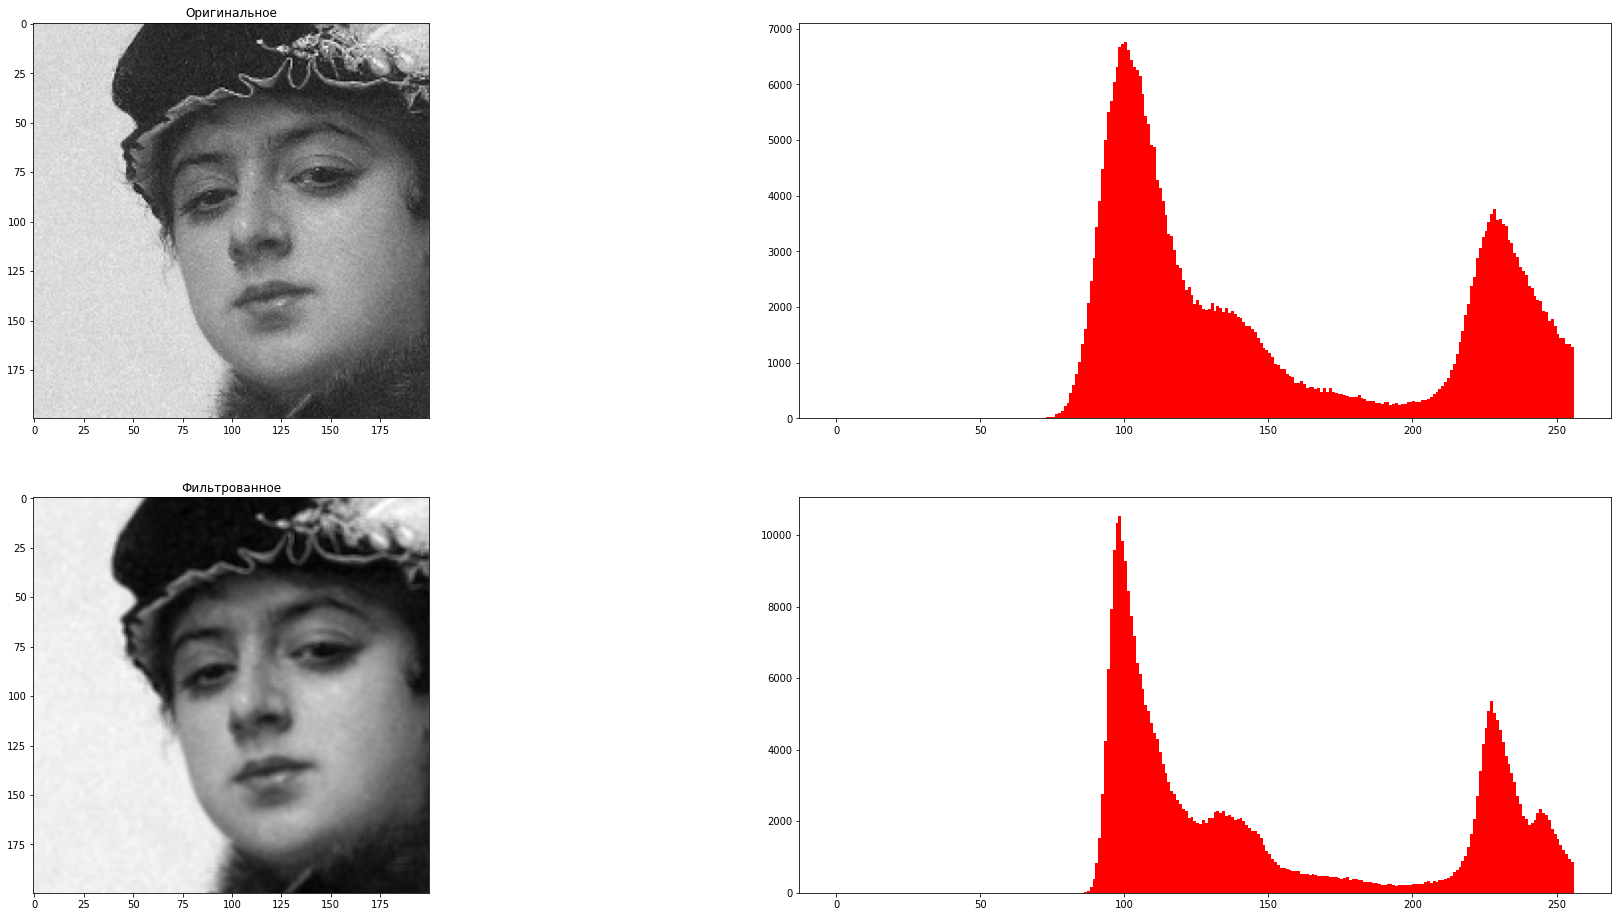

In [43]:

plt.figure(figsize=(32, 16))
plt.subplot(2, 2, 1)
plt.imshow(noisy_img[100:300, 400:600] , cmap='gray')
plt.title('Оригинальное')

plt.subplot(2, 2, 2)
plt.hist(noisy_img.flatten(),256,[0,256], color = 'r')

kernel1 = np.ones((3, 3), np.float32)/(3 ** 2)
img_filtred = cv.filter2D(src=noisy_img, ddepth=-1, kernel=kernel1)

plt.subplot(2, 2, 4)
plt.hist(img_filtred .flatten(),256,[0,256], color = 'r')

plt.subplot(2, 2, 3)
plt.imshow(img_filtred[100:300, 400:600] , cmap='gray')
plt.title('Фильтрованное')
plt.show()

In [44]:
img.std()

75.71780056858778

In [45]:
img_filtred.std()

75.32841493000643

In [46]:
noisy_img.std()

75.92537121713038